Employee_Attrition Machine Learning Project


In [79]:
#load libraries
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot



In [80]:
!pip install xgboost

In [81]:
import warnings
warnings.filterwarnings("ignore")

In [84]:
maindf = pd.read_csv('HR-Employee-Attrition.csv')

In [86]:
maindf.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [88]:
maindf.shape

(1470, 35)

In [89]:
#let's see what data types how many features we are having
maindf.dtypes.value_counts()

int64     26
object     9
dtype: int64

In [90]:
maindf['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [93]:
# let's see the total Missing values in dataset
maindf.isnull().sum().sum()

0

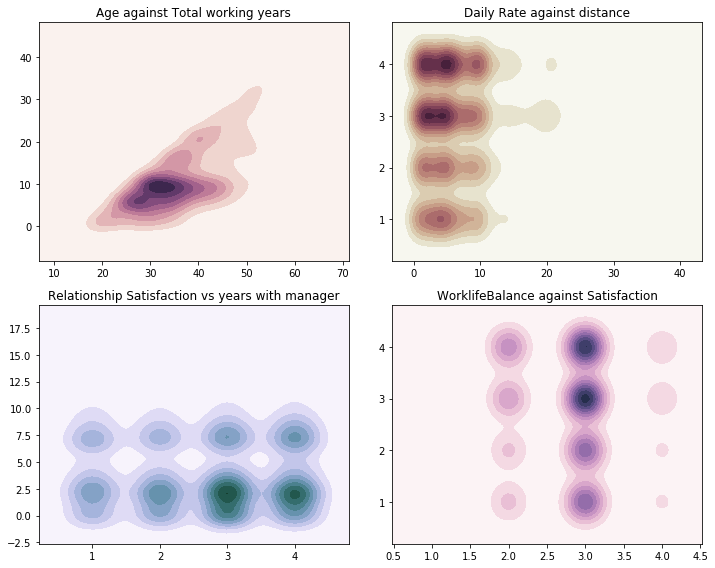

In [100]:
f, axes = plt.subplots(2, 2, figsize=(10, 8), 
                       sharex=False, sharey=False)

# Defining our colormap scheme
s = np.linspace(0, 5, 5)
cmap = sns.cubehelix_palette(start=0.0, light=1, as_cmap=True)

# Generate and plot
x = maindf['Age'].values
y = maindf['TotalWorkingYears'].values
sns.kdeplot(x, y, cmap=cmap, shade=True, cut=5, ax=axes[0,0])
axes[0,0].set( title = 'Age against Total working years')
cmap = sns.cubehelix_palette(start=0.333333333333, light=1, as_cmap=True)

# Generate and plot
x = maindf['YearsAtCompany'].values
y = maindf['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[0,1])
axes[0,1].set( title = 'Daily Rate against distance')
cmap = sns.cubehelix_palette(start=2.0, light=1, as_cmap=True)

# Generate and plot
x = maindf['RelationshipSatisfaction'].values
y = maindf['YearsWithCurrManager'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,0])
axes[1,0].set( title = 'Relationship Satisfaction vs years with manager')
cmap = sns.cubehelix_palette(start=2.666666666667, light=1, as_cmap=True)

# Generate and plot
x = maindf['WorkLifeBalance'].values
y = maindf['JobSatisfaction'].values
sns.kdeplot(x, y, cmap=cmap, shade=True,  ax=axes[1,1])
axes[1,1].set( title = 'WorklifeBalance against Satisfaction')

f.tight_layout()

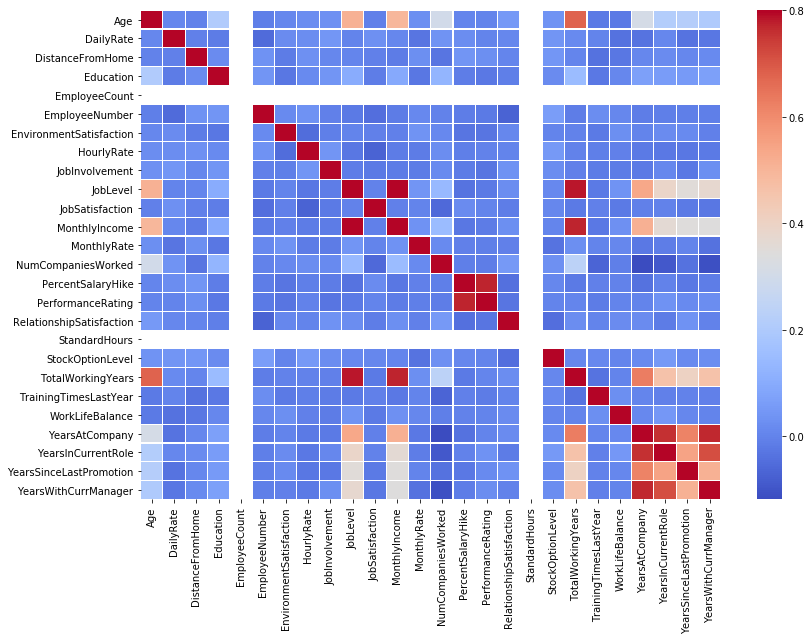

In [101]:
plt.figure(figsize=(13,9))
sns.heatmap(maindf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [103]:
categorical_features = maindf.select_dtypes(include=[np.object]).columns
print("total categorical_features",len(categorical_features))

total categorical_features 9


In [104]:
maindf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [105]:
# Business Travel
maindf['BusinessTravel'].value_counts()


Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

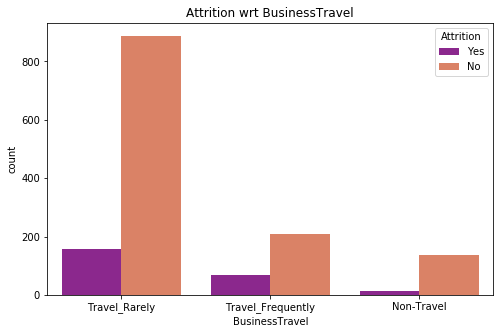

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(x='BusinessTravel',hue='Attrition', data=empdf, palette='plasma')
plt.title("Attrition wrt BusinessTravel")
plt.show()

In [106]:
# using plotly express.
fig = px.histogram(maindf, x='BusinessTravel', color='Attrition', barmode="group",
            width=650,height=390)
fig.show()

In [107]:
#Department
maindf['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

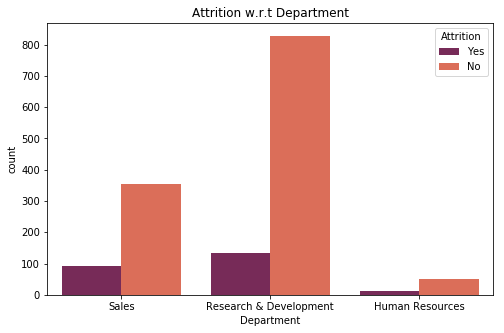

In [108]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='Department',hue='Attrition', data=maindf, palette='rocket')
plt.title("Attrition w.r.t Department")
plt.show()

In [109]:
#EducationField
maindf['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

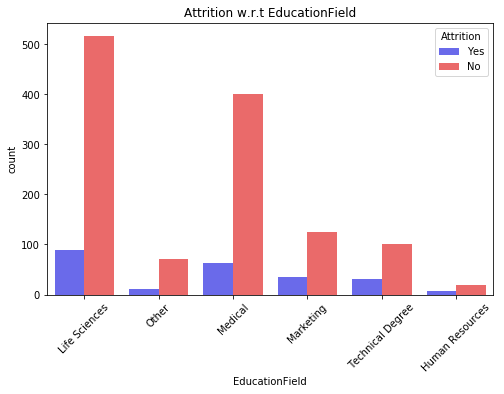

In [110]:
# Department wrt Attrition
plt.figure(figsize=(8,5))
sns.countplot(x='EducationField',hue='Attrition', data=maindf, palette='seismic')
plt.title("Attrition w.r.t EducationField")
plt.xticks(rotation=45)
plt.show()

In [111]:
#Gender
maindf['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

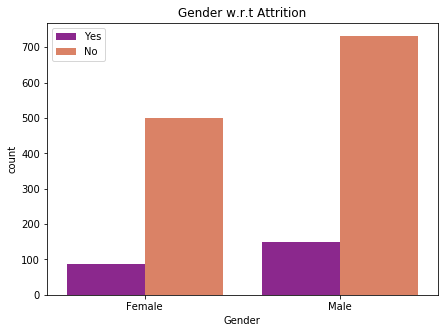

In [112]:
# most male of female employes Attriate
# Department wrt Attrition
plt.figure(figsize=(7,5))
sns.countplot(x='Gender',hue='Attrition', data=maindf, palette='plasma')
plt.title("Gender w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [113]:
# let's also see, how any male and female are Married
pd.crosstab(maindf['MaritalStatus'],empdf['Gender'])

Gender,Female,Male
MaritalStatus,,
Divorced,117,210
Married,272,401
Single,199,271


In [114]:
#JobRole
maindf['JobRole'].nunique()

9

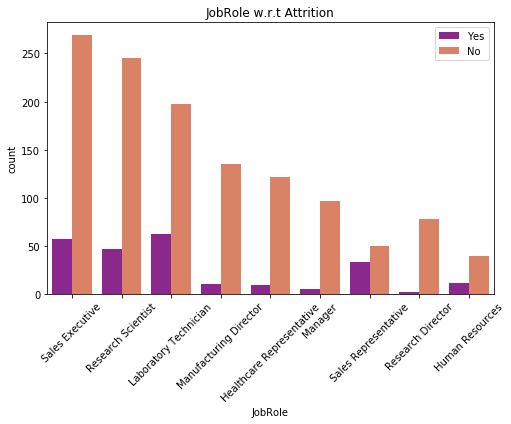

In [115]:
# let's see at which post most people are leaving the jobs
# JobRole
plt.figure(figsize=(8,5))
sns.countplot(x='JobRole',hue='Attrition', data=maindf, palette='plasma')
plt.title("JobRole w.r.t Attrition")
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.show()

In [116]:
#OverTime
maindf['OverTime'].value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

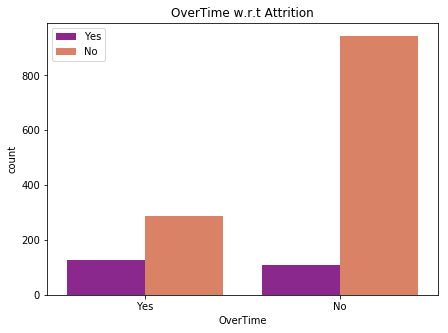

In [117]:
plt.figure(figsize=(7,5))
sns.countplot(x='OverTime',hue='Attrition', data=maindf, palette='plasma')
plt.title("OverTime w.r.t Attrition")
plt.legend(loc='best')
plt.show()

In [118]:
# how many male and female do overTime
pd.crosstab(maindf['OverTime'], empdf['Gender'])

Gender,Female,Male
OverTime,,
No,408,646
Yes,180,236


In [119]:
numerical_features = [feature for feature in maindf.columns if maindf[feature].dtype != 'O']
print("Total numerical_features", len(numerical_features))

Total numerical_features 26


In [120]:
maindf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


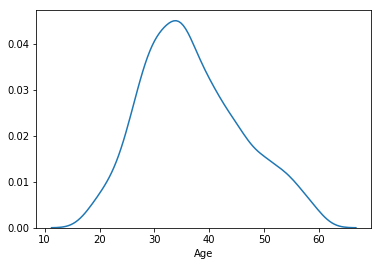

In [121]:
# distribution of age
sns.distplot(maindf['Age'],hist=False)
plt.show()

In [122]:
maindf['Age'].nunique()

43

In [123]:
ordinal_features = ['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction',
                    'PerformanceRating','RelationshipSatisfaction','WorkLifeBalance']
maindf[ordinal_features].head()

,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,2,2,3,4,3,1,1
1,1,3,2,2,4,4,3
2,2,4,2,3,3,2,3
3,4,4,3,3,3,3,3
4,1,1,3,2,3,4,3


In [124]:
# Education
maindf['Education'].value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

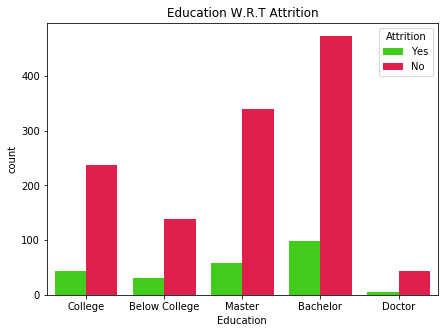

In [125]:
edu_map = {1 :'Below College', 2: 'College', 3 :'Bachelor', 4 :'Master', 5: 'Doctor'}
plt.figure(figsize=(7,5))
sns.countplot(x=empdf['Education'].map(edu_map), hue='Attrition', data=maindf, palette='prism')
plt.title("Education W.R.T Attrition")
plt.show()

In [126]:
#EnvironmentSatisfaction
maindf['EnvironmentSatisfaction'].value_counts()   # it is very nice response from employees

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [127]:
#JobInvolvement
maindf['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [128]:
numerical_features = [feature for feature in maindf.columns if maindf[feature].dtype != 'O' and feature not in ordinal_features]
print("total numerical_features",len(numerical_features))

total numerical_features 19


In [129]:
maindf[numerical_features].head()

,Age,DailyRate,DistanceFromHome,EmployeeCount,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,1,1,94,2,5993,19479,8,11,80,0,8,0,6,4,0,5
1,49,279,8,1,2,61,2,5130,24907,1,23,80,1,10,3,10,7,1,7
2,37,1373,2,1,4,92,1,2090,2396,6,15,80,0,7,3,0,0,0,0
3,33,1392,3,1,5,56,1,2909,23159,1,11,80,0,8,3,8,7,3,0
4,27,591,2,1,7,40,1,3468,16632,9,12,80,1,6,3,2,2,2,2


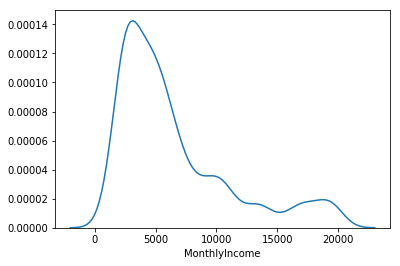

In [130]:
#MonthlyIncome
sns.distplot(maindf['MonthlyIncome'],hist=False)
plt.show()

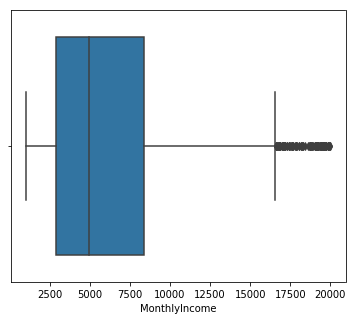

In [131]:
plt.figure(figsize=(6,5))
sns.boxplot(maindf['MonthlyIncome'])
plt.show()

In [132]:
# employee count in age group and whicg age employees are more
maindf.groupby('Age')['EmployeeCount'].sum().sort_values(ascending=False).head()

Age
35    78
34    77
31    69
36    69
29    68
Name: EmployeeCount, dtype: int64

In [133]:
#JobLevel
maindf['JobLevel'].value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

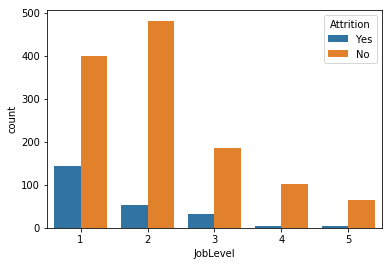

In [134]:
# JobLevel can have some effect on Attrition of Employees
sns.countplot(x='JobLevel',hue='Attrition',data=maindf)
plt.show()

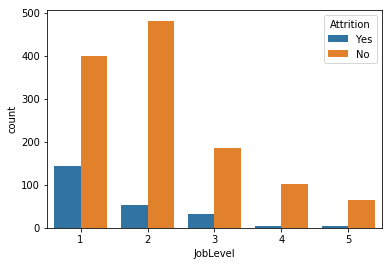

In [135]:
#NumCompaniesWorked
sns.countplot(x='JobLevel',hue='Attrition',data=maindf)
plt.show()

In [136]:
maindf['StockOptionLevel'].value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [137]:
#drop the columns which have save val in whole dataset or which are unrelevant for Attrition prediction. 
maindf.drop(['EmployeeCount','EmployeeNumber','StandardHours'],axis=1, inplace=True)

In [138]:
maindf[categorical_features].head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [139]:
# Target Variable(Attrition)
maindf['Attrition'] = maindf['Attrition'].replace({'No':0,'Yes':1})

In [140]:
#encode binary variables
maindf['OverTime'] = maindf['OverTime'].map({'No':0,'Yes':1})
maindf['Gender'] = maindf['Gender'].map({'Male':0,'Female':1})

In [141]:
#encode categorical columns which are ordinal, use labelEncoding
cat_cols = ['BusinessTravel','Department','EducationField','JobRole','MaritalStatus']
for col in cat_cols:
    map_dict = {k:i for i, k in enumerate(maindf[col].value_counts().index,0)}
    maindf[col] = maindf[col].map(map_dict)

In [142]:
# drop the Over18 column
maindf.drop('Over18',axis=1,inplace=True)

In [143]:
maindf.corr()['Attrition'][:-1].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.246118
DistanceFromHome            0.077924
Department                  0.077351
EducationField              0.062320
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
MaritalStatus               0.011195
PerformanceRating           0.002889
BusinessTravel             -0.000074
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
JobRole                    -0.027930
Gender                     -0.029453
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
Age                        -0.159205
MonthlyIncome              -0.159840
Y

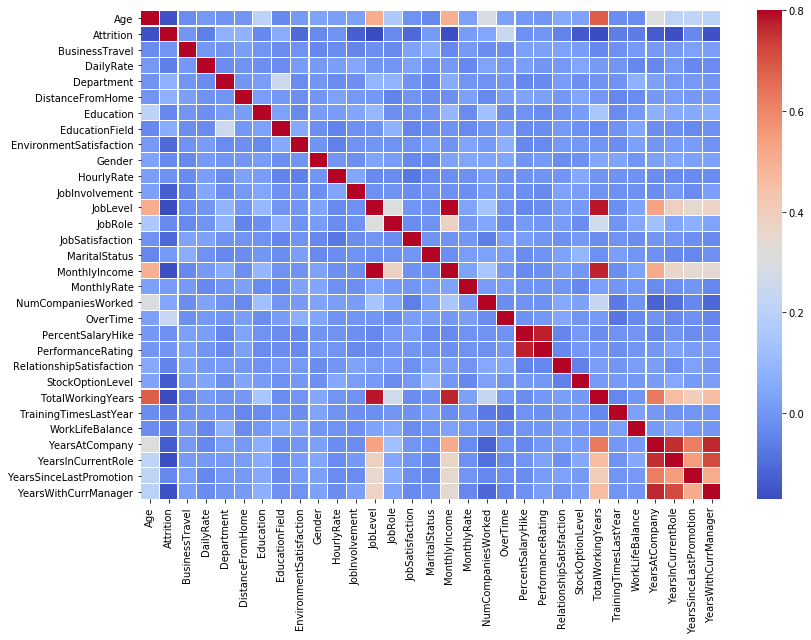

In [144]:
plt.figure(figsize=(13,9))
sns.heatmap(maindf.corr(),vmax=0.8,linewidth=0.1,cmap='coolwarm')
plt.show()

In [145]:
maindf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,1,1,2,0,2,1,94,3,2,0,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,0,8,1,0,3,0,61,2,2,1,2,0,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,0,1373,0,2,2,4,4,0,92,2,1,2,3,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,0,3,4,0,4,1,56,3,1,1,3,0,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,0,591,0,2,1,1,1,0,40,3,1,2,2,0,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [146]:
x = maindf.drop('Attrition',axis=1)
y = maindf['Attrition']

In [147]:
from sklearn.ensemble import ExtraTreesClassifier

extra_tree = ExtraTreesClassifier()

extra_tree.fit(x,y)

feat_importance = extra_tree.feature_importances_

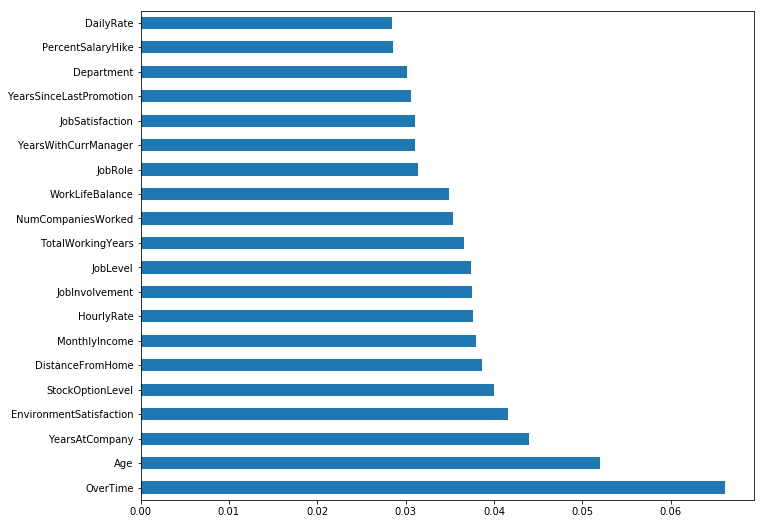

In [148]:
#plotting a feature importance
plt.figure(figsize=(11,9))
feat_imp = pd.Series(extra_tree.feature_importances_, index=x.columns)

feat_imp.nlargest(20).plot(kind='barh')
plt.show()

In [149]:
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()

x_scaled = min_max.fit(x).transform(x)

In [150]:
ExtraTree = ExtraTreesClassifier()

ExtraTree.fit(x_scaled, y)

feature_importance = pd.Series(ExtraTree.feature_importances_, index=x.columns)
feature_importance

Age                         0.050411
BusinessTravel              0.022457
DailyRate                   0.030638
Department                  0.021699
DistanceFromHome            0.038785
Education                   0.024873
EducationField              0.031372
EnvironmentSatisfaction     0.030345
Gender                      0.019584
HourlyRate                  0.029156
JobInvolvement              0.033815
JobLevel                    0.034413
JobRole                     0.036556
JobSatisfaction             0.039646
MaritalStatus               0.025611
MonthlyIncome               0.043393
MonthlyRate                 0.028453
NumCompaniesWorked          0.031523
OverTime                    0.068367
PercentSalaryHike           0.031797
PerformanceRating           0.013780
RelationshipSatisfaction    0.035009
StockOptionLevel            0.037480
TotalWorkingYears           0.037376
TrainingTimesLastYear       0.032024
WorkLifeBalance             0.032254
YearsAtCompany              0.039451
Y

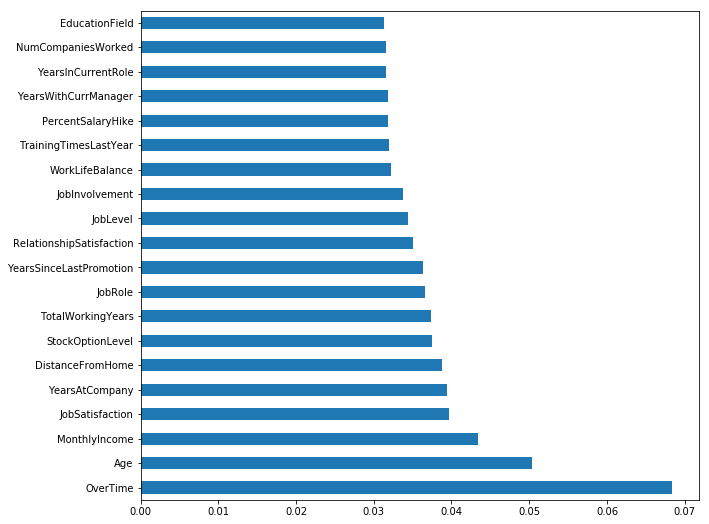

In [151]:
plt.figure(figsize=(10,9))
feature_importance.nlargest(20).plot(kind='barh')
plt.show()

In [174]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#metrics
from sklearn.metrics import accuracy_score, classification_report

In [175]:
#split data into train and test set.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)
print("training shape: ",x_train.shape)
print("testing shape: ",x_test.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [176]:
#models
log_clf = LogisticRegression()
svc_clf = SVC()
knn_clf = KNeighborsClassifier()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()

In [177]:
# first check the accuracy score on without scaled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train, y_train)
    
    pred = clf.predict(x_test)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.8722826086956522
SVC   0.8695652173913043
KNeighborsClassifier   0.8396739130434783
DecisionTreeClassifier   0.7934782608695652
RandomForestClassifier   0.8722826086956522


In [178]:
# if we do same thing on scaled features
#split data into train and test set using scaled data.
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled = train_test_split(x_scaled,y,test_size=0.25,random_state=42)
print("training shape: ",x_train_scaled.shape)
print("testing shape: ",x_test_scaled.shape)

training shape:  (1102, 30)
testing shape:  (368, 30)


In [179]:
# Now check the accuracy score on scaled features
for clf in [log_clf, svc_clf, knn_clf, dt_clf, rf_clf]:
    clf.fit(x_train_scaled, y_train_scaled)
    
    pred = clf.predict(x_test_scaled)
    
    print(clf.__class__.__name__, " ", accuracy_score(y_test,pred))

LogisticRegression   0.8994565217391305
SVC   0.8695652173913043
KNeighborsClassifier   0.875
DecisionTreeClassifier   0.8097826086956522
RandomForestClassifier   0.8559782608695652


In [180]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [181]:
# XGBOOST
xgb = XGBClassifier()

xgb.fit(x_train_scaled, y_train_scaled)

prediction = xgb.predict(x_test_scaled)

print("accuracy: ",accuracy_score(y_test,prediction))

[16:41:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy:  0.8804347826086957
